# Virus genome data set filtering

In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
def histograms(stats):
    # Creating histograms with custom labels
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # Adjust grid if you have a different layout

    stats[['N_share', 'Length']].hist(bins=50, log=True, ax=axes)

    # Setting y-axis label for the left column
    axes[0].set_ylabel('Number of sequences')

    axes[0].set_xlim(0, 1)
    axes[1].set_xlim(left=0)

    # Setting x-axis labels with the feature names
    features = ['N_share', 'Length']
    for ax, feature in zip(axes.flatten(), features):
        ax.set_xlabel(feature)
        ax.set_title('')  # Remove the title above each plot

    plt.tight_layout()
    plt.show()

# Data ingestion

In [4]:
virus = 'MARV'
#fname_stats = f'/Users/nils.petersen/dev/virus_dataset_curation/data/db2.0/stats/{virus}.stats.tsv'
fname_stats = f'/Users/nils.petersen/dev/virus_dataset_curation/workflow/output_test/stats/{virus}.stats.tsv'
stats = pd.read_csv(fname_stats, sep='\t')
stats

,Unnamed: 0.1,Unnamed: 0,Sequence,Reference,IsForward,ReferenceStart,ReferenceEnd,QueryStart,QueryEnd,EditDistance,IsSupplementaryAlignment,N_share,Length,ReferenceLength,Label,Segment,RelativeLength,FilteringStatus
0,0,378,AF005730.1,NC_001608.3,True,2853,4410,0,1557,85,False,0.000000,1557,19111.0,MARV,Unsegmented,0.081471,TooShort
1,1,380,AF005732.1,NC_001608.3,True,2853,4410,0,1557,85,False,0.000000,1557,19111.0,MARV,Unsegmented,0.081471,TooShort
2,2,381,AF005733.1,NC_001608.3,True,5940,7986,0,2046,170,False,0.000000,2046,19111.0,MARV,Unsegmented,0.107059,TooShort
3,3,383,AF005735.1,NC_001608.3,True,5940,7986,0,2046,129,False,0.000000,2046,19111.0,MARV,Unsegmented,0.107059,TooShort
4,4,376,AX717721.1,NC_001608.3,True,5936,7988,5,2045,16,False,0.000000,2051,19111.0,MARV,Unsegmented,0.107320,TooShort
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,389,78,KU179482.1,NC_024781.1,True,0,19114,0,19114,4,False,0.000000,19114,19114.0,MARV,Unsegmented,1.000000,Ok
390,390,43,MT321489.1,NC_024781.1,True,230,10586,0,10356,1674,False,0.190509,18692,19114.0,MARV,Unsegmented,0.977922,TooManyN
391,391,0,NC_024781.1,NC_024781.1,True,0,19114,0,19114,0,False,0.000000,19114,19114.0,MARV,Unsegmented,1.000000,Ok
392,392,27,OK572966.1,NC_024781.1,True,64,19074,0,19010,2,False,0.000000,19043,19114.0,MARV,Unsegmented,0.996285,Ok


# Unmapped

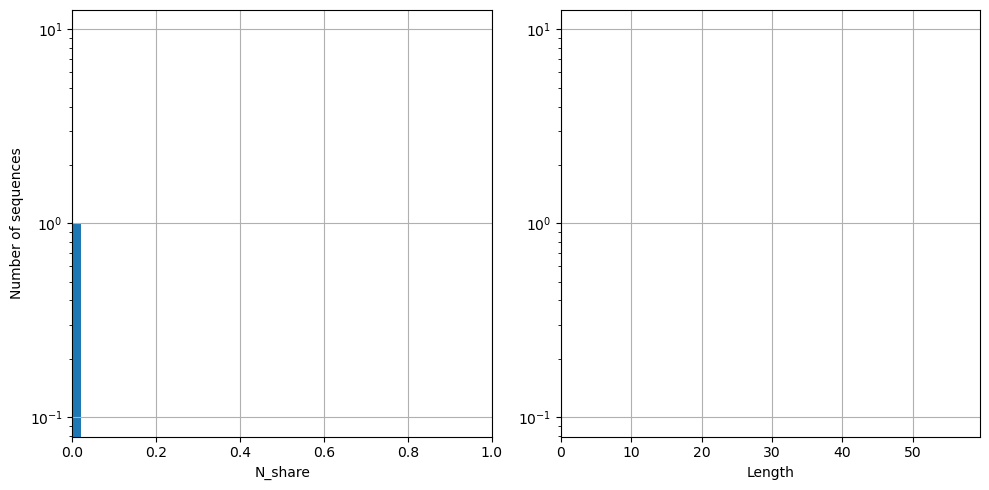

In [5]:
unmapped = stats[stats['FilteringStatus'] == 'Unmapped']
histograms(unmapped)

In [ ]:
columns = ['Sequence','Length', 'N_share']
unmapped.sort_values(by="Length", ascending=False)[columns].head(20)


: 

: 

: 

# Too many N

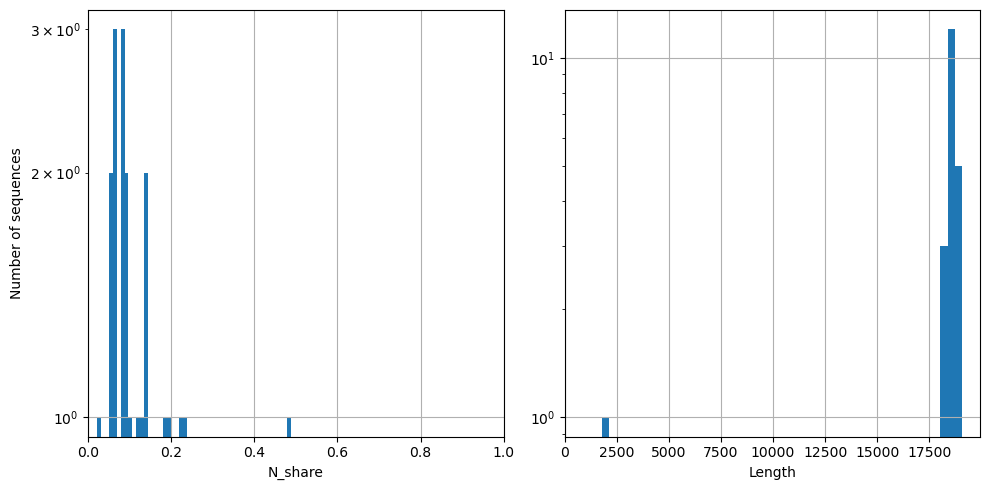

In [6]:
too_many_N = stats[stats['FilteringStatus'] == 'TooManyN']
histograms(too_many_N)

# Too short

In [7]:
def histograms_relative_length(stats):

    columns = ['N_share', 'Length', 'RelativeLength']
    ncols = len(columns)
    # Creating histograms with custom labels
    fig, axes = plt.subplots(1, ncols, figsize=(12, 4))  # Adjust grid if you have a different layout

    stats[columns].hist(bins=50, log=True, ax=axes)

    # Setting y-axis label for the left column
    axes[0].set_ylabel('Number of sequences')

    axes[0].set_xlim(0, 1)
    axes[1].set_xlim(left=0)
    axes[2].set_xlim(left=0)

    # Setting x-axis labels with the feature names
    for ax, feature in zip(axes.flatten(), columns):
        ax.set_xlabel(feature)
        ax.set_title('')  # Remove the title above each plot

    plt.tight_layout()
    plt.show()

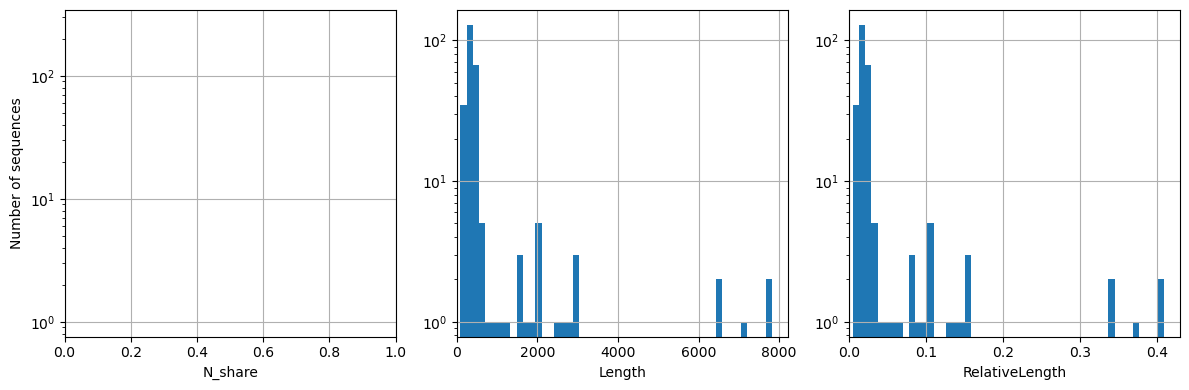

In [8]:
too_short = stats[stats['FilteringStatus'] == 'TooShort']
histograms_relative_length(too_short)

In [9]:
columns = ['Sequence','Length', 'N_share']
too_short.sort_values(by="Length", ascending=False)[columns].head(20)

,Sequence,Length,N_share
351,X68494.1,7829,0.0
282,M92834.1,7818,0.0
315,OK573188.1,7091,0.0
8,CS402436.1,6458,0.0
9,CS402437.1,6458,0.0
281,M72714.1,3000,0.0
350,X68493.1,2948,0.0
349,X64406.1,2906,0.0
352,X68495.1,2852,0.0
316,OK573189.1,2595,0.0


# Ok

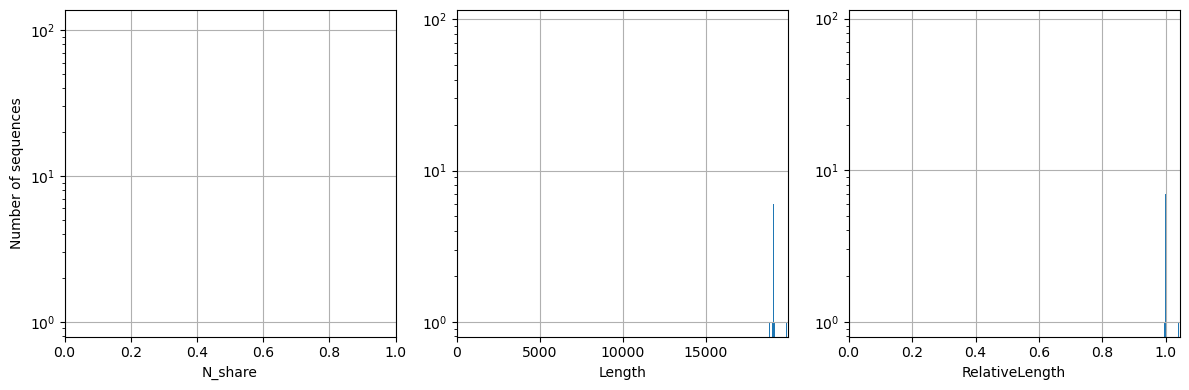

In [10]:
ok = stats[stats['FilteringStatus'] == 'Ok']
histograms_relative_length(ok)

In [11]:
print(f'OK: {len(ok)}')
print(f'Too many N {len(too_many_N)}')
print(f'Too short {len(too_short)}')
print(f'Unmapped {len(unmapped)}')

OK: 111
Too many N 21
Too short 261
Unmapped 1
